In [75]:
import json
def load_json(file):
    with open(file, 'r') as f:
        return json.load(f)
    
def get_percentage_decrease_json(json, min_key=1024):
    min_val = json[min_key]['wer']
    out = {}
    for key in json:
        if key > min_key:
            out[key] = (min_val - json[key]['wer']) / min_val * 100
    return out

def get_data(df, dataset='earnings22', split='test', return_all=False):
    seq_lens = df.loc[df['dataset'] == dataset].loc[df['split'] == split]['seq_len'].unique()
    print(seq_lens)

    out_data = {}
    for seq_len in seq_lens:
        sset = df.loc[df['dataset'] == dataset].loc[df['split'] == split].loc[df['seq_len'] == seq_len]
        if not return_all:
            out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
        else:
            out_data[seq_len] = [el*100 for el in sset['wer'].tolist()]
        if len(sset) != 3:
            print(f'Sequence length {seq_len} has {len(sset)} results')
    return out_data

def get_num_unique_tal(ep:str, json_data, key='speaker'):
    return len(set([el[key] for el in json_data[ep]]))


In [3]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [4]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [5]:
dpi = 300
# default
width = 6.4
height = 4.8
tw = 8
rot = 45

In [6]:
from matplotlib.pyplot import figure
import matplotlib

In [7]:
!ls

bin
eval.ipynb
evals_decode_method_comparison.pdf
evals_NoPos_post_windowed_attn.csv
evals_rb_buffered.csv
evals_rb_buffered_variable_overlap.csv
evals_rb_moving_window_p9375.csv
evals_rb_post_overlapping_overlap_comparison.csv
evals_rb_post_windowed_attn.csv
evals_rb_post_windowed_attn_per_rec.csv
evals_rb_post_windowed_overlap_comparison.csv
evals_sinusoidal_post_windowed_attn.csv
evals_windowed_18l_1024D.csv
evals_windowed_256d_12l.csv
evals_windowed_256d_6l.csv
evals_windowed_9l.csv
evals_windowed_rb_3epoch.csv
evals_windowed_rotary_10K.csv
IS_paper
old
shuffled_evals_rb_post_windowed_attn.csv
windowed_attn_pdecrease_across_datasets.pdf
windowed_attn_pdecrease_across_model_sizes.pdf
windowed_attn_pdecrease_across_pos_encodings.pdf


[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_9537/3661304998.py:16: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


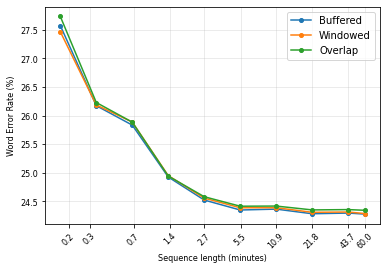

In [193]:
csv1 = pd.read_csv('evals_rb_buffered.csv') 
csv2 = pd.read_csv('evals_rb_post_windowed_attn.csv')
csv3 = pd.read_csv('./IS_paper/evals_rb.csv')
dataset = 'earnings22_full'

data1 = get_data(csv1, dataset=dataset)
data2 = get_data(csv2, dataset=dataset)
data3 = get_data(csv3, dataset=dataset)

plt.plot([el/100/60 for el in sorted(data3.keys())], [data1[key]['wer'] for key in sorted(data3.keys())], label='Buffered', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(data3.keys())], [data2[key]['wer'] for key in sorted(data3.keys())], label='Windowed', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(data3.keys())], [data3[key]['wer'] for key in sorted(data3.keys())], label='Overlap', marker='o', markersize=4)
plt.legend()

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data1.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.rc('ytick', labelsize=tw)

plt.xlabel('Sequence length (minutes)', fontsize=tw)
plt.ylabel('Word Error Rate (%)', fontsize=tw)
ax.grid(True, axis='both', alpha=0.3)

plt.savefig('./evals_decode_method_comparison.pdf', bbox_inches='tight')

In [9]:
ted_decrease

NameError: name 'ted_decrease' is not defined

['this_american_life' 'tedlium' 'rev16' 'earnings22' 'earnings22_full']
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_9537/3959690359.py:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


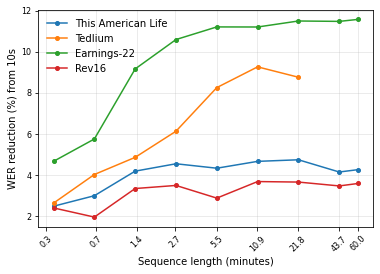

In [192]:
csv1 = pd.read_csv('evals_rb_post_windowed_attn.csv')

print(csv1.dataset.unique())
tal = get_data(csv1, dataset='this_american_life')
ted = get_data(csv1, dataset='tedlium')
earnings = get_data(csv1, dataset='earnings22_full')
rev16 = get_data(csv1, dataset='rev16')

tal_decrease = get_percentage_decrease_json(tal)
ted_decrease = {k:v for k,v in get_percentage_decrease_json(ted).items() if k <= 131072}
earnings_decrease = get_percentage_decrease_json(earnings)
rev16_decrease = get_percentage_decrease_json(rev16)

plt.plot([el/100/60 for el in sorted(tal_decrease.keys())], [tal_decrease[key] for key in sorted(tal_decrease.keys())], label='This American Life', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(ted_decrease.keys())], [ted_decrease[key] for key in sorted(ted_decrease.keys())], label='Tedlium', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(earnings_decrease.keys())], [earnings_decrease[key] for key in sorted(earnings_decrease.keys())], label='Earnings-22', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(rev16_decrease.keys())], [rev16_decrease[key] for key in sorted(rev16_decrease.keys())], label='Rev16', marker='o', markersize=4)
# top left legend
plt.legend(framealpha=0.0, loc='upper left') 

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(tal_decrease.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.rc('ytick', labelsize=tw)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('./windowed_attn_pdecrease_across_datasets.pdf', transparent = True, bbox_inches = 'tight')
ax.grid(True, axis='both', alpha=0.3)
plt.show()

In [19]:
rb10k_data_ted

{1024: {'wer': 6.736369543387079, 'std': 0.12119622993189978},
 2048: {'wer': 6.53907496012759, 'std': 0.06148981595923552},
 4096: {'wer': 6.509539842873171, 'std': 0.1098896894487181},
 8192: {'wer': 6.477641916238404, 'std': 0.08276580961964772},
 16384: {'wer': 6.46110225057593, 'std': 0.044267219552710686},
 32768: {'wer': 6.433929942701868, 'std': 0.08154260228832393}}

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1

/tmp/ipykernel_9537/2980118486.py:58: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


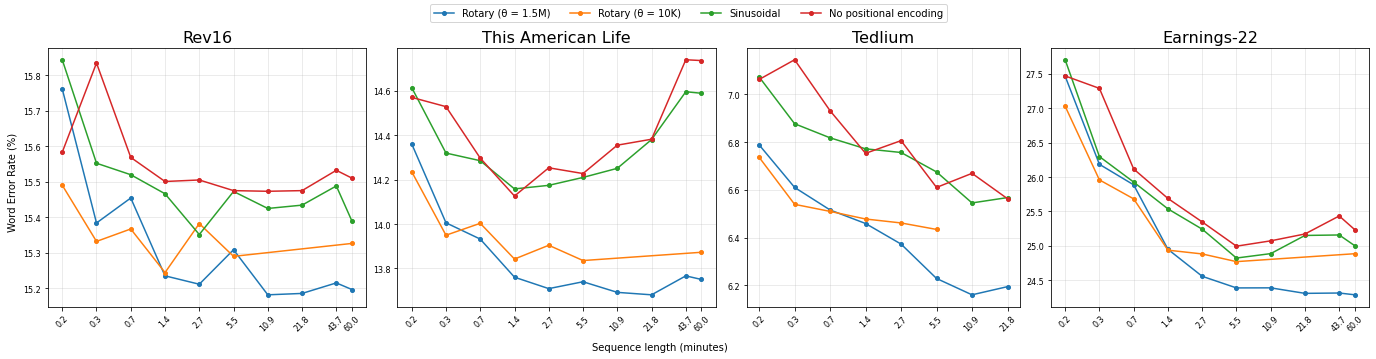

In [202]:
rb1p5M_csv = pd.read_csv('evals_rb_post_windowed_attn.csv')
rb10k_csv = pd.read_csv('evals_windowed_rotary_10K.csv')
sinus_csv = pd.read_csv('evals_sinusoidal_post_windowed_attn.csv')
noPos_csv = pd.read_csv('evals_NoPos_post_windowed_attn.csv')

d = 'earnings22_full'
rb1p5M_data_e22 = get_data(rb1p5M_csv, dataset=d)
rb10k_data_e22 = get_data(rb10k_csv, dataset=d)
sinus_data_e22 = get_data(sinus_csv, dataset=d)
noPos_data_e22 = get_data(noPos_csv, dataset=d)
d = 'tedlium'
rb1p5M_data_ted = {k:v for k,v in get_data(rb1p5M_csv, dataset=d).items() if k <= 131072}
rb10k_data_ted = {k:v for k,v in get_data(rb10k_csv, dataset=d).items() if k <= 131072}
sinus_data_ted = {k:v for k,v in get_data(sinus_csv, dataset=d).items() if k <= 131072}
noPos_data_ted = {k:v for k,v in get_data(noPos_csv, dataset=d).items() if k <= 131072}
d = 'this_american_life'
rb1p5M_data_tal = get_data(rb1p5M_csv, dataset=d)
rb10k_data_tal = get_data(rb10k_csv, dataset=d)
sinus_data_tal = get_data(sinus_csv, dataset=d)
noPos_data_tal = get_data(noPos_csv, dataset=d)
d = 'rev16'
rb1p5M_data_rev16 = get_data(rb1p5M_csv, dataset=d)
rb10k_data_rev16 = get_data(rb10k_csv, dataset=d)
sinus_data_rev16 = get_data(sinus_csv, dataset=d)
noPos_data_rev16 = get_data(noPos_csv, dataset=d)
#
rb1p5M_data_all = [rb1p5M_data_e22, rb1p5M_data_ted, rb1p5M_data_tal, rb1p5M_data_rev16][::-1]
rb10k_data_all = [rb10k_data_e22, rb10k_data_ted, rb10k_data_tal, rb10k_data_rev16][::-1]
sinus_data_all = [sinus_data_e22, sinus_data_ted, sinus_data_tal, sinus_data_rev16][::-1]
noPos_data_all = [noPos_data_e22, noPos_data_ted, noPos_data_tal, noPos_data_rev16][::-1]
#


#fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=False, sharex=False)


fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 6/7, 1])
axs = []
for i in range(4):
    axs.append(fig.add_subplot(gs[i]))


for i, d in enumerate(['Earnings-22', 'Tedlium', 'This American Life', 'Rev16'][::-1]):
    axs[i].plot([el/100/60 for el in sorted(rb1p5M_data_all[i].keys())], [rb1p5M_data_all[i][key]['wer'] for key in sorted(rb1p5M_data_all[i].keys())], label='Rotary (θ = 1.5M)', marker='o', markersize=4)
    axs[i].plot([el/100/60 for el in sorted(rb10k_data_all[i].keys())], [rb10k_data_all[i][key]['wer'] for key in sorted(rb10k_data_all[i].keys())], label='Rotary (θ = 10K)', marker='o', markersize=4)
    axs[i].plot([el/100/60 for el in sorted(sinus_data_all[i].keys())], [sinus_data_all[i][key]['wer'] for key in sorted(sinus_data_all[i].keys())], label='Sinusoidal', marker='o', markersize=4)
    axs[i].plot([el/100/60 for el in sorted(noPos_data_all[i].keys())], [noPos_data_all[i][key]['wer'] for key in sorted(noPos_data_all[i].keys())], label='No positional encoding', marker='o', markersize=4)
    axs[i].set_title(d, fontsize=tw*2)





#axs[1].legend(framealpha=0.0, loc='upper right') 

for i, ax in enumerate(axs):
    ax.set_xscale('log', basex=2)
    ax.set_xticks([el / 100 / 60 for el in sorted(rb1p5M_data_all[i].keys())])
    ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
    ax.tick_params(axis='x', labelsize=tw, rotation=rot)
    ax.tick_params(axis='y', labelsize=tw)

handles, labels = [], []
for ax in axs:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='upper center', ncol=4)

fig.text(0.5, 0.04, 'Sequence length (minutes)', ha='center', va='center')
fig.text(0.05, 0.5, 'Word Error Rate (%)', ha='center', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.subplots_adjust(wspace=0.1)  # Adjust horizontal space between subplots

for i, ax in enumerate(axs):
    # both x and y axis
    ax.grid(True, axis='both', alpha=0.3)
    ax.yaxis.grid(True)

#axs[0].ylabel('WER reduction (%) from 10s')
plt.savefig('./windowed_attn_pdecrease_across_pos_encodings.pdf', transparent = True, bbox_inches = 'tight')
plt.show()

In [99]:
axs[::-1]

array([<AxesSubplot:title={'center':'Rev16'}>,
       <AxesSubplot:title={'center':'This American Life'}>,
       <AxesSubplot:title={'center':'Tedlium'}>,
       <AxesSubplot:title={'center':'Earnings-22'}>], dtype=object)

In [9]:
csv1 = pd.read_csv('evals_rotary_windowed.csv')
dataset = 'earnings22'
csv1 = csv1.loc[csv1['dataset'] == dataset]
wer_and_checkpoint_csv = csv1[['checkpoint', 'wer']]
wer_and_checkpoint = {}
for index, row in wer_and_checkpoint_csv.iterrows():
    wer_and_checkpoint[row['checkpoint']] = row['wer']

wer_and_checkpoint

{'/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_32_rp_2/step_105360.pt': 0.2871441086289969,
 '/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_64_rp_2/step_105360.pt': 0.2704117389399912,
 '/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_128_rp_2/step_105360.pt': 0.2582347787998248,
 '/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_256_rp_2/step_105360.pt': 0.2526938239159001,
 '/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_512_rp_2/step_105360.pt': 0.2471528690319754,
 '/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_1024_rp_2/step_105360.pt': 0.2446123521681997,
 '/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_2048_rp_2/step_105360.pt': 0.2411081909767849,
 '/mnt/parscr

In [22]:
l9_768D_csv

,Unnamed: 0,dataset,split,wer,recording,words,ins_rate,del_rate,sub_rate,name,checkpoint,repeat,seq_len,overlap_ratio,model_class
0,0,this_american_life,test,0.140316,all,354684,0.045875,0.029860,0.064581,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,1024,0.875,SCConformerXL
1,0,this_american_life,test,0.136589,all,354684,0.046444,0.027001,0.063144,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,1024,0.875,SCConformerXL
2,0,this_american_life,test,0.150334,all,354684,0.051091,0.026018,0.073226,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,1024,0.875,SCConformerXL
3,0,this_american_life,test,0.136175,all,354684,0.045133,0.028941,0.062100,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,2048,0.875,SCConformerXL
4,0,this_american_life,test,0.136127,all,354684,0.045378,0.028321,0.062427,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,2048,0.875,SCConformerXL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,earnings22,dev,0.221792,all,45660,0.024179,0.061235,0.136378,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,262144,0.875,SCConformerXL
236,0,earnings22,dev,0.220149,all,45660,0.023697,0.058760,0.137692,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,262144,0.875,SCConformerXL
237,0,earnings22,dev,0.223412,all,45660,0.023565,0.059198,0.140648,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,360000,0.875,SCConformerXL
238,0,earnings22,dev,0.219842,all,45660,0.023982,0.057381,0.138480,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,360000,0.875,SCConformerXL


In [14]:
l6_256D_data_e22_pd

{2048: 3.9332096864648705,
 4096: 4.017648034917974,
 8192: 7.31242398973296,
 16384: 8.098414785532901,
 32768: 9.016524290728382,
 65536: 9.354802798648144,
 131072: 9.137090489763427}

[  2048   4096   8192  16384  32768  65536 131072 262144 360000   1024]
Sequence length 2048 has 5 results
Sequence length 4096 has 6 results
Sequence length 8192 has 4 results
Sequence length 32768 has 4 results
Sequence length 65536 has 4 results
Sequence length 131072 has 5 results
Sequence length 262144 has 5 results
Sequence length 360000 has 6 results
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  2048   4096   8192  16384  32768  65536 131072 262144 360000   1024]
Sequence length 2048 has 5 results
Sequence length 4096 has 6 results
Sequence length 8192 has 4 results
Sequence length 32768 has 4 results
Sequence length 65536 has 4 results
Sequence length 131072 has 5 results
Sequence length 262144 has 5 results
Sequence length 360000 has 6 

/tmp/ipykernel_9537/1400024071.py:111: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


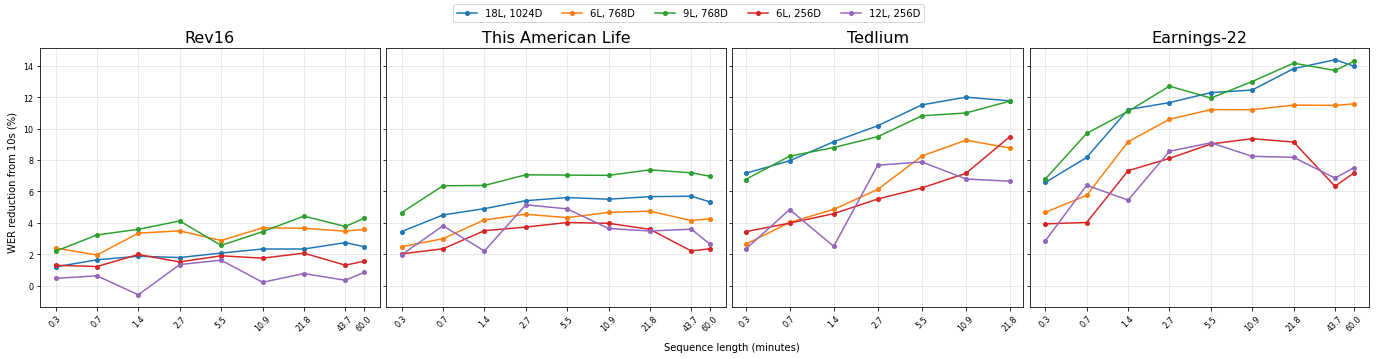

In [190]:
import matplotlib.gridspec as gridspec


l18_D1024_csv = pd.read_csv('evals_windowed_18l_1024D.csv')
l6_768D_csv = pd.read_csv('evals_rb_post_windowed_attn.csv')
l9_768D_csv = pd.read_csv('evals_windowed_9l.csv')
l6_256D_csv = pd.read_csv('evals_windowed_256d_6l.csv')
l12_256D_csv = pd.read_csv('evals_windowed_256d_12l.csv')

d = 'earnings22_full'
l18_D1024_data_e22 = get_data(l18_D1024_csv, dataset=d)
l18_D1024_data_e22_pd = get_percentage_decrease_json(l18_D1024_data_e22)
#-
l6_768D_data_e22 = get_data(l6_768D_csv, dataset=d)
l6_768D_data_e22_pd = get_percentage_decrease_json(l6_768D_data_e22)
#-
l9_768D_data_e22 = get_data(l9_768D_csv, dataset=d)
l9_768D_data_e22_pd = get_percentage_decrease_json(l9_768D_data_e22)
#-
l6_256D_data_e22 = get_data(l6_256D_csv, dataset=d)
l6_256D_data_e22_pd = get_percentage_decrease_json(l6_256D_data_e22)
#-
l12_256D_data_e22 = get_data(l12_256D_csv, dataset=d)
l12_256D_data_e22_pd = get_percentage_decrease_json(l12_256D_data_e22)

d = 'tedlium'
l18_D1024_data_ted = {k:v for k,v in get_data(l18_D1024_csv, dataset=d).items() if k <= 131072}
l18_D1024_data_ted_pd = get_percentage_decrease_json(l18_D1024_data_ted)
#-
l6_768D_data_ted = {k:v for k,v in get_data(l6_768D_csv, dataset=d).items() if k <= 131072}
l6_768D_data_ted_pd = get_percentage_decrease_json(l6_768D_data_ted)
#=
l9_768D_data_ted = {k:v for k,v in get_data(l9_768D_csv, dataset=d).items() if k <= 131072}
l9_768D_data_ted_pd = get_percentage_decrease_json(l9_768D_data_ted)
#-
l6_256D_data_ted = {k:v for k,v in get_data(l6_256D_csv, dataset=d).items() if k <= 131072}
l6_256D_data_ted_pd = get_percentage_decrease_json(l6_256D_data_ted)
#-
l12_256D_data_ted = {k:v for k,v in get_data(l12_256D_csv, dataset=d).items() if k <= 131072}
l12_256D_data_ted_pd = get_percentage_decrease_json(l12_256D_data_ted)

d = 'this_american_life'
l18_D1024_data_tal = get_data(l18_D1024_csv, dataset=d)
l18_D1024_data_tal_pd = get_percentage_decrease_json(l18_D1024_data_tal)
#-
l6_768D_data_tal = get_data(l6_768D_csv, dataset=d)
l6_768D_data_tal_pd = get_percentage_decrease_json(l6_768D_data_tal)
#-
l9_768D_data_tal = get_data(l9_768D_csv, dataset=d)
l9_768D_data_tal_pd = get_percentage_decrease_json(l9_768D_data_tal)
#-
l6_256D_data_tal = get_data(l6_256D_csv, dataset=d)
l6_256D_data_tal_pd = get_percentage_decrease_json(l6_256D_data_tal)
#-
l12_256D_data_tal = get_data(l12_256D_csv, dataset=d)
l12_256D_data_tal_pd = get_percentage_decrease_json(l12_256D_data_tal)

d = 'rev16'
l18_D1024_data_rev16 = get_data(l18_D1024_csv, dataset=d)
l18_D1024_data_rev16_pd = get_percentage_decrease_json(l18_D1024_data_rev16)
#-
l6_768D_data_rev16 = get_data(l6_768D_csv, dataset=d)
l6_768D_data_rev16_pd = get_percentage_decrease_json(l6_768D_data_rev16)
#-
l9_768D_data_rev16 = get_data(l9_768D_csv, dataset=d)
l9_768D_data_rev16_pd = get_percentage_decrease_json(l9_768D_data_rev16)
#-
l6_256D_data_rev16 = get_data(l6_256D_csv, dataset=d)
l6_256D_data_rev16_pd = get_percentage_decrease_json(l6_256D_data_rev16)
#-
l12_256D_data_rev16 = get_data(l12_256D_csv, dataset=d)
l12_256D_data_rev16_pd = get_percentage_decrease_json(l12_256D_data_rev16)

# ---
l18_D1024_data_all = [l18_D1024_data_e22_pd, l18_D1024_data_ted_pd, l18_D1024_data_tal_pd, l18_D1024_data_rev16_pd][::-1]
l6_768D_data_all = [l6_768D_data_e22_pd, l6_768D_data_ted_pd, l6_768D_data_tal_pd, l6_768D_data_rev16_pd][::-1]
l9_768D_data_all = [l9_768D_data_e22_pd, l9_768D_data_ted_pd, l9_768D_data_tal_pd, l9_768D_data_rev16_pd][::-1]
l6_256D_data_all = [l6_256D_data_e22_pd, l6_256D_data_ted_pd, l6_256D_data_tal_pd, l6_256D_data_rev16_pd][::-1]
l12_256D_data_all = [l12_256D_data_e22_pd, l12_256D_data_ted_pd, l12_256D_data_tal_pd, l12_256D_data_rev16_pd][::-1]
# ---

fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 6/7, 1])
axs = [fig.add_subplot(gs[0])]
for i in range(3):
    axs.append(fig.add_subplot(gs[i+1], sharey=axs[0]))
    #axs[-1].get_yaxis().set_visible(False)
 

#fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True, sharex=False)


for i, d in enumerate(['Earnings-22', 'Tedlium', 'This American Life', 'Rev16'][::-1]):
    axs[i].plot([el/100/60 for el in sorted(l18_D1024_data_all[i].keys())], [l18_D1024_data_all[i][key] for key in sorted(l18_D1024_data_all[i].keys())], label='18L, 1024D', marker='o', markersize=4)
    axs[i].plot([el/100/60 for el in sorted(l6_768D_data_all[i].keys())], [l6_768D_data_all[i][key] for key in sorted(l6_768D_data_all[i].keys())], label='6L, 768D', marker='o', markersize=4)
    axs[i].plot([el/100/60 for el in sorted(l9_768D_data_all[i].keys())], [l9_768D_data_all[i][key] for key in sorted(l9_768D_data_all[i].keys())], label='9L, 768D', marker='o', markersize=4)
    axs[i].plot([el/100/60 for el in sorted(l6_256D_data_all[i].keys())], [l6_256D_data_all[i][key] for key in sorted(l6_256D_data_all[i].keys())], label='6L, 256D', marker='o', markersize=4)
    axs[i].plot([el/100/60 for el in sorted(l12_256D_data_all[i].keys())], [l12_256D_data_all[i][key] for key in sorted(l12_256D_data_all[i].keys())], label='12L, 256D', marker='o', markersize=4)
    axs[i].set_title(d, fontsize=tw*2)

# axs[0].plot([el/100/60 for el in sorted(rb10M_data_e22.keys())], [rb10M_data_e22[key]['wer'] for key in sorted(rb10M_data_e22.keys())], label='Rotary (θ = 1.5M)', marker='o', markersize=4)
# axs[0].plot([el/100/60 for el in sorted(sinus_data_e22.keys())], [sinus_data_e22[key]['wer'] for key in sorted(sinus_data_e22.keys())], label='Sinusoidal', marker='o', markersize=4)
# axs[0].plot([el/100/60 for el in sorted(noPos_data_e22.keys())], [noPos_data_e22[key]['wer'] for key in sorted(noPos_data_e22.keys())], label='No positional encoding', marker='o', markersize=4)
# axs[0].set_title('Earnings-22', fontsize=tw*2)



#axs[1].legend(framealpha=0.0, loc='upper right') 

for i, ax in enumerate(axs):
    ax.set_xscale('log', basex=2)
    ax.set_xticks([el / 100 / 60 for el in sorted(l18_D1024_data_all[i].keys())])
    ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
    ax.tick_params(axis='x', labelsize=tw, rotation=rot)
    ax.tick_params(axis='y', labelsize=tw)

handles, labels = [], []
for ax in axs:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='upper center', ncol=5)

fig.text(0.55, 0.04, 'Sequence length (minutes)', ha='center', va='center')
fig.text(0.05, 0.5, 'WER reduction from 10s (%)', ha='center', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95]) # 
plt.subplots_adjust(wspace=0.02)  # Adjust horizontal space between subplots

for i, ax in enumerate(axs):
    if i > 0: ax.yaxis.set_tick_params(labelleft=False)
    # both x and y axis
    ax.grid(True, axis='both', alpha=0.3)
    ax.yaxis.grid(True)

#axs[0].ylabel('WER reduction (%) from 10s')
plt.savefig('./windowed_attn_pdecrease_across_model_sizes.pdf', transparent = True, bbox_inches = 'tight')
plt.show()

In [177]:
axs[1].get_ygridlines() = None

SyntaxError: cannot assign to function call (1759494196.py, line 1)

In [60]:
csv1 = pd.read_csv('evals_rotary_windowed.csv')
csv1.loc[csv1['dataset'] == 'tedlium'].iloc[3].checkpoint



'/mnt/parscratch/users/acp21rjf/spotify/checkpoints_seq_scheduler_window_sizes/rb_window_size_256_rp_2/step_105360.pt'

In [67]:
data

{32: 8.17950701890129,
 64: 7.78711174975129,
 128: 7.52735713496186,
 256: 7.36708301094285,
 512: 7.217862274787221,
 1024: 7.273129214104119,
 2048: 7.3062893776942595,
 4096: 7.19022880512877,
 8192: 7.1736487233337005,
 16384: 6.974687741792859,
 32768: 7.20128219299215,
 360000: 6.902840720680881}

In [1]:
csv1 = pd.read_csv('evals_rotary_windowed.csv')
def get_windowed_data(csv, dataset='earnings22_full', subsampling=8):
    data = csv.loc[csv['dataset'] == dataset]
    #select wer and checkpoint columns
    data = data[['checkpoint', 'wer']].copy()
    data_dict = {}
    for checkpoint in data['checkpoint']:
        data_dict[int(checkpoint.split('/')[-2].split('_')[-3])*subsampling*2] = data.loc[data['checkpoint'] == checkpoint].iloc[0]['wer']*100

    if 5760000 in data_dict: del data_dict[5760000] 
    return data_dict

d = 'earnings22'
data = get_windowed_data(csv1, dataset=d)

plt.plot([el/100/60 for el in sorted(data.keys())], [data[key] for key in sorted(data.keys())], label='Rotary', marker='o', markersize=4)
# # log
ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data.keys())])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


NameError: name 'pd' is not defined

No handles with labels found to put in legend.


[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_9537/1742020669.py:10: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


Text(0, 0.5, 'Word Error Rate (%)')

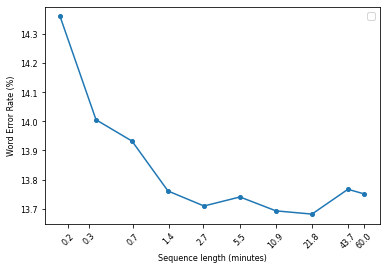

In [76]:
csv1 = pd.read_csv('evals_rb_post_windowed_attn.csv')
dataset = 'this_american_life'

data1 = get_data(csv1, dataset=dataset)

plt.plot([el/100/60 for el in sorted(data1.keys())], [data1[key]['wer'] for key in sorted(data1.keys())], marker='o', markersize=4)
plt.legend()

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data1.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.rc('ytick', labelsize=tw)

plt.xlabel('Sequence length (minutes)', fontsize=tw)
plt.ylabel('Word Error Rate (%)', fontsize=tw)



No handles with labels found to put in legend.


[  2048   4096   8192  16384  32768  65536 131072 262144 360000]
Sequence length 8192 has 2 results


/tmp/ipykernel_9537/509650688.py:10: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


Text(0, 0.5, 'Word Error Rate (%)')

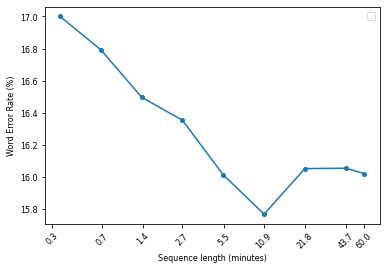

In [79]:
csv1 = pd.read_csv('evals_windowed_rb_3epoch.csv')
dataset = 'earnings22'

data1 = get_data(csv1, dataset=dataset)

plt.plot([el/100/60 for el in sorted(data1.keys())], [data1[key]['wer'] for key in sorted(data1.keys())], marker='o', markersize=4)
plt.legend()

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data1.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.rc('ytick', labelsize=tw)

plt.xlabel('Sequence length (minutes)', fontsize=tw)
plt.ylabel('Word Error Rate (%)', fontsize=tw)



0.2613316806257567
[0.2759578721863312, 0.2624477992244311, 0.262024140756046, 0.2618351343044681, 0.26172828987030233, 0.26170428368414483]
[0.2759578721863312, 0.2725073210414898, 0.2768376481917086, 0.26292251310281306, 0.2616846729968612, 0.26142060494912883]


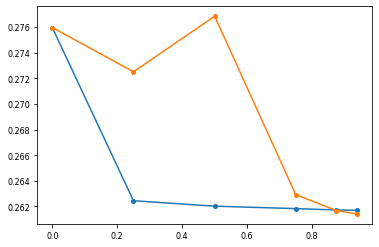

In [9]:
csv1 = pd.read_csv('evals_rb_buffered_variable_overlap.csv') 
csv3 = pd.read_csv('evals_rb_post_overlapping_overlap_comparison.csv')

windowed = [
    0.259223193627473,
    0.263674143410251,
    0.261097704839546
]
print(np.mean(windowed))
dataset = 'earnings22_full'
overlaps = csv1['overlap_ratio'].unique()

data1 = [csv1.loc[csv1['overlap_ratio'] == overlap]['wer'].mean() for overlap in csv1['overlap_ratio'].unique()]
data3 = [csv3.loc[csv3['overlap_ratio'] == overlap]['wer'].mean() for overlap in csv3['overlap_ratio'].unique()]

plt.plot(overlaps, data1, label='Buffered', marker='o', markersize=4)
plt.plot(overlaps, data3, label='Overlap', marker='o', markersize=4)
print(data1)
print(data3)

In [63]:
sorted(data.keys())

['1024', '16384', '2048', '32768', '4096', '512', '8192']

In [83]:
get_data(pd.read_csv('evals_rb_post_windowed_attn.csv'), 'earnings22')[360000]['wer']

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


18.01632525240147

In [203]:
get_data(pd.read_csv('evals_rb_post_windowed_attn.csv'), 'earnings22')

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


{1024: {'wer': 20.699303555746173, 'std': 0.23220996601253943},
 2048: {'wer': 19.650892851064405, 'std': 0.15557267447270903},
 4096: {'wer': 19.273737311847718, 'std': 0.3664198366944614},
 8192: {'wer': 18.654902681616726, 'std': 0.054954247276817074},
 16384: {'wer': 18.42615852786798, 'std': 0.21878989017571795},
 32768: {'wer': 18.3070209477905, 'std': 0.049874266711305654},
 65536: {'wer': 18.24098468911899, 'std': 0.012310752554663752},
 131072: {'wer': 18.05581085037, 'std': 0.3668142607448155},
 262144: {'wer': 18.08576544193234, 'std': 0.1937587292643537},
 360000: {'wer': 18.01632525240147, 'std': 0.07052300724264236}}

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_9537/3206918861.py:19: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


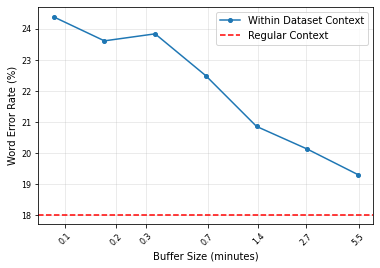

In [204]:
csv = pd.read_csv('shuffled_evals_rb_post_windowed_attn.csv')

def get_data_shuffled_eval(csv):
    names = [el for el in csv.name.unique() if not pd.isna(el)]
    out_data = {}
    for name in names:
        sset = csv.loc[csv['name'] == name]
        buffer = sset['name'].unique()[0].split('_')[4].split('-')[1]
        wer = sset['wer'].mean()
        out_data[int(buffer)] = wer*100
    return out_data

data = get_data_shuffled_eval(csv)
plt.plot([el/100/60 for el in sorted(data.keys())], [data[key] for key in sorted(data.keys())], marker='o', markersize=4, label='Within Dataset Context')
baseline = get_data(pd.read_csv('evals_rb_post_windowed_attn.csv'), 'earnings22')[360000]['wer']
plt.axhline(y=baseline, color='r', linestyle='--', label='Regular Context')

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.rc('ytick', labelsize=tw)
plt.xlabel('Buffer Size (minutes)')
plt.ylabel('Word Error Rate (%)')
plt.legend()
ax.grid(True, axis='both', alpha=0.3)
plt.savefig('./shuffled_evals.pdf', transparent = True, bbox_inches = 'tight')

plt.show()




In [37]:
2-float('nan')

nan

In [7]:
per_rec_tal = pd.read_csv('evals_rb_post_windowed_attn_per_rec.csv')

In [32]:
per_rec_tal .

,Unnamed: 0,dataset,split,wer,recording,words,ins_rate,del_rate,sub_rate,name,checkpoint,repeat,seq_len,overlap_ratio,model_class
0,0,this_american_life,all,0.213012,ep-1,8638,0.104654,0.037509,0.070850,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,1024,0.875,SCConformerXL
1,1,this_american_life,all,0.175789,ep-10,7765,0.035415,0.098777,0.041597,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,1024,0.875,SCConformerXL
2,2,this_american_life,all,0.224225,ep-100,9486,0.080540,0.044381,0.099304,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,1024,0.875,SCConformerXL
3,3,this_american_life,all,0.158742,ep-101,9506,0.028929,0.046076,0.083737,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,1024,0.875,SCConformerXL
4,4,this_american_life,all,0.158793,ep-102,9906,0.039572,0.045326,0.073895,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,1024,0.875,SCConformerXL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24745,121,earnings22_full,test,0.312178,4470570,5247,0.038879,0.089194,0.184105,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,360000,0.875,SCConformerXL
24746,122,earnings22_full,test,0.268321,4469075,4271,0.020838,0.090845,0.156638,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,360000,0.875,SCConformerXL
24747,123,earnings22_full,test,0.265611,4472403,7703,0.038297,0.071790,0.155524,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,360000,0.875,SCConformerXL
24748,124,earnings22_full,test,0.216446,4443920,8367,0.023067,0.062627,0.130752,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,360000,0.875,SCConformerXL


[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_9829/2687719402.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


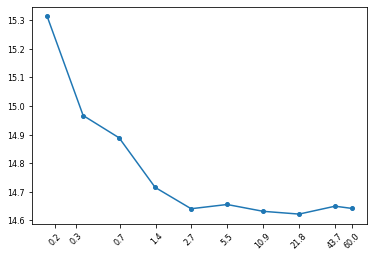

In [37]:
tal = per_rec_tal.loc[per_rec_tal['recording'] == 'all']
tal = get_data(tal, dataset='this_american_life', split='all')
plt.xscale('log', base=2)
plt.plot([el/100/60 for el in tal.keys()], [tal[el]['wer'] for el in tal.keys()], label='This American Life', marker='o', markersize=4)

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(tal.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)

plt.rc('ytick', labelsize=tw)

In [8]:
tal_train = load_json('/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/this_american_life/train-transcripts-aligned.json')
tal_test = load_json('/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/this_american_life/test-transcripts-aligned.json')
tal_dev = load_json('/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/this_american_life/valid-transcripts-aligned.json')
tal_all = {**tal_train, **tal_test, **tal_dev}

/tmp/ipykernel_9829/1338737676.py:19: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_9829/1338737676.py:21: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


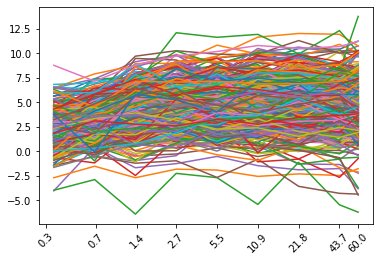

In [9]:
recordings = sorted([el for el in per_rec_tal.recording.unique() if el.startswith('ep')], key=lambda x: int(x.split('-')[1]))

data = {k: {} for k in recordings}
for rec in recordings:
    rec_results = per_rec_tal.loc[per_rec_tal['recording'] == rec]
    seq_lens = rec_results['seq_len'].unique()
    for seq_len in seq_lens:
        seq_results = rec_results.loc[rec_results['seq_len'] == seq_len]
        data[rec][seq_len] = {'wer': seq_results['wer'].mean()*100, 'std': seq_results['wer'].std()*100}

for rec in recordings:
    if data[rec][1024]['wer'] < 40:
        pdecrease = get_percentage_decrease_json(data[rec])
        plt.plot([el/100/60 for el in list(data[rec].keys())][1:], pdecrease.values(), label=rec)
        data[rec]['decreases'] = pdecrease
        data[rec]['m'] = np.polyfit([el/100/60 for el in list(data[rec]['decreases'].keys())], list(data[rec]['decreases'].values()), 1)[0]

all_seqs = sorted(list(set(np.array([np.array(list(data[el]['decreases'].keys())) for el in data if 'm' in data[el]]).reshape(-1).tolist())))
plt.xscale('log', basex=2)
ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in all_seqs])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.show()

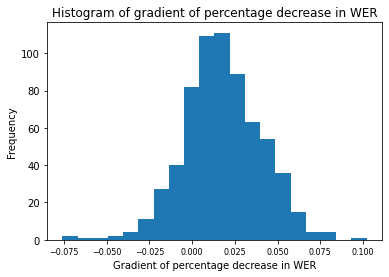

In [10]:
ms = [data[el]['m'] for el in data if 'm' in data[el]]
# plot histogram
plt.hist(ms, bins=20)
plt.title('Histogram of gradient of percentage decrease in WER')
plt.xlabel('Gradient of percentage decrease in WER')
plt.ylabel('Frequency')
plt.show()

In [14]:
sorted_ms = sorted([(el, get_num_unique_tal(el, tal_all, key='speaker'), get_num_unique_tal(el, tal_all, key='act'), data[el]['m']) for el in data if 'm' in data[el]], key=lambda x: x[-1])

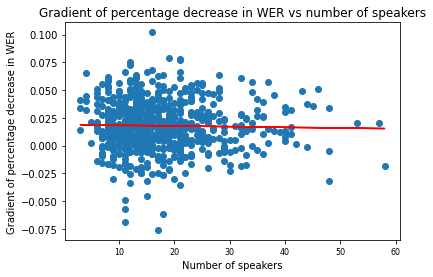

In [15]:
plt.plot([el[1] for el in sorted_ms], [el[-1] for el in sorted_ms], 'o')
# get line of best fit
m, c = np.polyfit([el[1] for el in sorted_ms], [el[-1] for el in sorted_ms], 1)
plt.plot([el[1] for el in sorted_ms], [m*el[1] + c for el in sorted_ms], 'r')
plt.title('Gradient of percentage decrease in WER vs number of speakers')
plt.xlabel('Number of speakers')
plt.ylabel('Gradient of percentage decrease in WER')
plt.show()

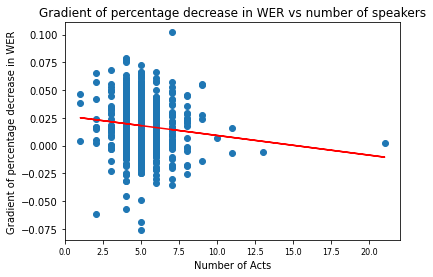

In [17]:
plt.plot([el[2] for el in sorted_ms], [el[-1] for el in sorted_ms], 'o')
# get line of best fit
m, c = np.polyfit([el[2] for el in sorted_ms], [el[-1] for el in sorted_ms], 1)
plt.plot([el[2] for el in sorted_ms], [m*el[2] + c for el in sorted_ms], 'r')
plt.title('Gradient of percentage decrease in WER vs number of speakers')
plt.xlabel('Number of Acts')
plt.ylabel('Gradient of percentage decrease in WER')
plt.show()

In [23]:
import torch
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
!ls "/home/robertflynn/Downloads/david16.wav"

/home/robertflynn/Downloads/david16.wav


In [8]:
wav = "/home/robertflynn/Downloads/david16.wav"
audio, sr = sf.read(wav)

In [13]:
#convert to spectrogram
spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=80, hop_length=160, n_fft=400)

/tmp/ipykernel_17308/2627506080.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')


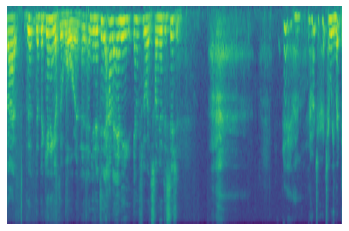

/tmp/ipykernel_17308/2627506080.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')


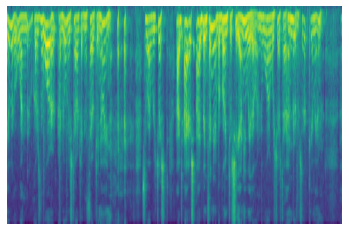

/tmp/ipykernel_17308/2627506080.py:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')


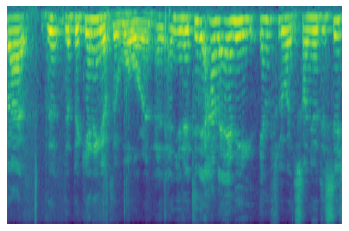

/tmp/ipykernel_17308/2627506080.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')


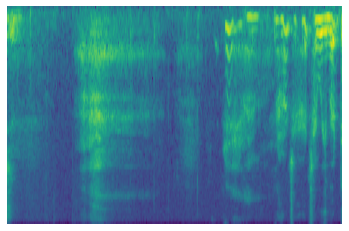

/tmp/ipykernel_17308/2627506080.py:26: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')


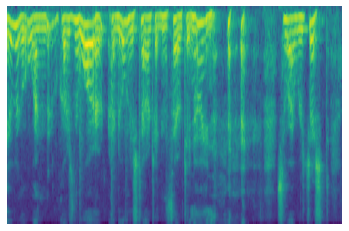

/tmp/ipykernel_17308/2627506080.py:31: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')


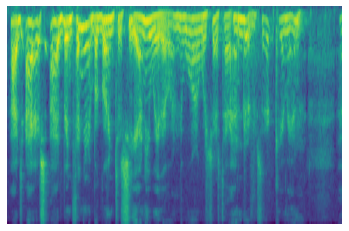

In [47]:
step = 10
slen = 1024
plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')
plt.axis('off')
plt.savefig('spec_10s_1.svg', format='svg', bbox_inches='tight')
plt.show()
step = 11
plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')
plt.axis('off')
plt.savefig('spec_10s_2.svg', format='svg', bbox_inches='tight')
plt.show()


step = 20
slen = 512
plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')
plt.axis('off')
plt.savefig('spec_5s_1.svg', format='svg', bbox_inches='tight')
plt.show()
step = 21
plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')
plt.axis('off')
plt.savefig('spec_5s_2.svg', format='svg', bbox_inches='tight')
plt.show()
step = 22
plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')
plt.axis('off')
plt.savefig('spec_5s_3.svg', format='svg', bbox_inches='tight')
plt.show()
step = 23
plt.imshow(np.log(spec).T[slen*step:slen*(step+1)].T, aspect='auto')
plt.axis('off')
plt.savefig('spec_5s_4.svg', format='svg', bbox_inches='tight')
plt.show()